In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import warnings
import pickle
#plt.style.use('ggplot')
import matplotlib.patches as mpatches
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\nilanjan.das\Downloads\1631008497606__90% Opportunities.csv')

In [3]:
df.shape

(42991, 285)

In [28]:
df['IsWon'].value_counts(normalize=True)*100

True     60.06606
False    39.93394
Name: IsWon, dtype: float64

In [29]:
selected_df = df[['Account_Oracle_Source__c','Account_Owner__c','Amount','Area__c','BigMachines__Line_Items__c','CloseDate','Country__c','CreatedById','CreatedDate','Currency_Rate__c','CurrencyIsoCode',	'Current_Duration_at_Stage1__c','Current_Duration_at_Stage2__c','Days_Until_Modified__c','DN_Account_Strategy__c','Duration_at_Stage1__c','Duration_at_Stage2__c','Earliest_Delivery_Commence_Date__c','Eligible_for_Fast_Track__c','End_Date_Stage_1__c','HasOpportunityLineItem','Id','IsWon','LastModifiedDate','Legal_Contract_evaluation__c','LoB_Services__c','Pricebook2Id','Retail__c','RFP_Due_Date__c','Stage_Change_Date__c','Start_Date_Stage2__c','Sub_Area__c',	'SumofTotalProducts__c','T_CBasedFastTrackEligible__c','WNC_Area__c','WNC_Region__c']]

In [30]:
null_val_df = round(100 *selected_df.isna().sum() / selected_df.shape[0], 2).to_frame()

In [7]:
## null value less than 5% ##

selected_columns = null_val_df[null_val_df[0]<5.00]
sel_col_list = list(selected_columns. index)
updated_df = selected_df[selected_df.columns.intersection(sel_col_list)]
updated_df

,Account_Owner__c,Area__c,BigMachines__Line_Items__c,CloseDate,Country__c,CreatedById,CreatedDate,Currency_Rate__c,CurrencyIsoCode,Days_Until_Modified__c,...,IsWon,LastModifiedDate,LoB_Services__c,Retail__c,Stage_Change_Date__c,Sub_Area__c,SumofTotalProducts__c,T_CBasedFastTrackEligible__c,WNC_Area__c,WNC_Region__c
0,005U0000001C0T8,USA,1,12/31/2019,United States,005U0000000PDgeIAG,2019-12-31T14:50:54.000+0000,1.000000,USD,-610.0,...,True,2021-08-31T17:25:52.000+0000,False,False,12/31/2019,USA,1,False,USA,Americas
1,005U0000000OuXq,USA,1,1/2/2020,United States,005U0000000PDDjIAO,2019-12-31T15:11:47.000+0000,1.000000,USD,-608.0,...,True,2021-09-01T07:08:53.000+0000,False,False,1/2/2020,USA,4500,False,USA,Americas
2,0050B000007iLlG,Canada,1,3/19/2020,Canada,0050B000007Lx0ZQAS,2019-12-31T16:10:00.000+0000,1.344356,CAD,-514.0,...,False,2021-08-31T18:10:28.000+0000,False,False,4/5/2020,Canada,0,False,Canada,Americas
3,0050B0000071iqX,USA,2,3/3/2020,United States,0050B0000071iqXQAQ,2019-12-31T18:02:41.000+0000,1.000000,USD,-546.0,...,False,2021-08-31T19:11:59.000+0000,False,False,3/3/2020,USA,0,False,USA,Americas
4,005U0000002AZ0E,MCAD,1,8/28/2020,Belize,005U0000002AZ0EIAW,2019-12-31T18:07:24.000+0000,1.000000,USD,-414.0,...,False,2021-08-31T07:14:36.000+0000,False,False,7/14/2020,Central America,0,False,MCAD,Americas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42986,005U0000000OuXq,USA,1,9/1/2021,United States,005U0000000PDOUIA4,2021-08-31T23:58:42.000+0000,1.000000,USD,0.0,...,True,2021-09-01T13:43:29.000+0000,True,False,9/1/2021,USA,4587,False,USA,Americas
42987,0050B000007Lx0t,ITV,1,9/1/2021,Thailand,0050B000007Lx0tQAC,2021-09-01T03:24:16.000+0000,1.000000,USD,0.0,...,True,2021-09-01T10:18:00.000+0000,False,True,9/1/2021,ITV,12200,True,ITV,Eurasia
42988,0050B000007iuSi,DACH,0,9/1/2021,Germany,0050B000007iuSiQAI,2021-09-01T08:10:57.000+0000,0.840972,EUR,0.0,...,False,2021-09-01T08:17:57.000+0000,False,True,9/1/2021,Germany,0,False,DACH,Eurasia
42989,0050B000007LvEI,DACH,0,9/1/2021,Germany,0050B000007LvEIQA0,2021-09-01T09:34:21.000+0000,0.840972,EUR,0.0,...,False,2021-09-01T09:35:51.000+0000,False,True,9/1/2021,Germany,0,False,DACH,Eurasia


In [8]:
updated_df.dtypes.value_counts()

object     13
bool        6
int64       4
float64     2
dtype: int64

In [9]:
objList = updated_df.select_dtypes(include = "object").columns
print (objList)

Index(['Account_Owner__c', 'Area__c', 'CloseDate', 'Country__c', 'CreatedById',
       'CreatedDate', 'CurrencyIsoCode', 'Id', 'LastModifiedDate',
       'Stage_Change_Date__c', 'Sub_Area__c', 'WNC_Area__c', 'WNC_Region__c'],
      dtype='object')


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    updated_df[feat] = le.fit_transform(updated_df[feat].astype(str))

print (updated_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42991 entries, 0 to 42990
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Account_Owner__c              42991 non-null  int32  
 1   Area__c                       42991 non-null  int32  
 2   BigMachines__Line_Items__c    42991 non-null  int64  
 3   CloseDate                     42991 non-null  int32  
 4   Country__c                    42991 non-null  int32  
 5   CreatedById                   42991 non-null  int32  
 6   CreatedDate                   42991 non-null  int32  
 7   Currency_Rate__c              42962 non-null  float64
 8   CurrencyIsoCode               42991 non-null  int32  
 9   Days_Until_Modified__c        42843 non-null  float64
 10  Duration_at_Stage1__c         42991 non-null  int64  
 11  Duration_at_Stage2__c         42991 non-null  int64  
 12  Eligible_for_Fast_Track__c    42991 non-null  bool   
 13  H

In [11]:
bool_objList = updated_df.select_dtypes(include = "bool").columns
print(bool_objList)

Index(['Eligible_for_Fast_Track__c', 'HasOpportunityLineItem', 'IsWon',
       'LoB_Services__c', 'Retail__c', 'T_CBasedFastTrackEligible__c'],
      dtype='object')


In [12]:
for feat_bl in bool_objList:
    updated_df[feat_bl] = le.fit_transform(updated_df[feat_bl].astype(str))

print (updated_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42991 entries, 0 to 42990
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Account_Owner__c              42991 non-null  int32  
 1   Area__c                       42991 non-null  int32  
 2   BigMachines__Line_Items__c    42991 non-null  int64  
 3   CloseDate                     42991 non-null  int32  
 4   Country__c                    42991 non-null  int32  
 5   CreatedById                   42991 non-null  int32  
 6   CreatedDate                   42991 non-null  int32  
 7   Currency_Rate__c              42962 non-null  float64
 8   CurrencyIsoCode               42991 non-null  int32  
 9   Days_Until_Modified__c        42843 non-null  float64
 10  Duration_at_Stage1__c         42991 non-null  int64  
 11  Duration_at_Stage2__c         42991 non-null  int64  
 12  Eligible_for_Fast_Track__c    42991 non-null  int32  
 13  H

In [13]:
updated_df

,Account_Owner__c,Area__c,BigMachines__Line_Items__c,CloseDate,Country__c,CreatedById,CreatedDate,Currency_Rate__c,CurrencyIsoCode,Days_Until_Modified__c,...,IsWon,LastModifiedDate,LoB_Services__c,Retail__c,Stage_Change_Date__c,Sub_Area__c,SumofTotalProducts__c,T_CBasedFastTrackEligible__c,WNC_Area__c,WNC_Region__c
0,394,22,1,209,139,547,0,1.000000,30,-610.0,...,1,765,0,0,140,45,1,0,22,0
1,334,22,1,19,139,504,1,1.000000,30,-608.0,...,1,2312,0,0,17,45,4500,0,22,0
2,208,4,1,302,25,236,2,1.344356,2,-514.0,...,0,829,0,0,309,9,0,0,4,0
3,4,22,2,328,139,3,3,1.000000,30,-546.0,...,0,923,0,0,244,45,0,0,22,0
4,432,13,1,648,13,592,4,1.000000,30,-414.0,...,0,137,0,0,450,10,0,0,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42986,334,22,1,673,139,542,37854,1.000000,30,0.0,...,1,4437,1,0,563,45,4587,0,22,0
42987,176,10,1,673,131,237,37855,1.000000,30,0.0,...,1,3750,0,1,563,17,12200,1,10,1
42988,211,6,0,673,46,300,37856,0.840972,9,0.0,...,0,2841,0,1,563,14,0,0,6,1
42989,111,6,0,673,46,138,37857,0.840972,9,0.0,...,0,3579,0,1,563,14,0,0,6,1


In [14]:
updated_df.dtypes.value_counts()

int32      19
int64       4
float64     2
dtype: int64

In [15]:
##### drop columns with same value
updated_df.drop(updated_df.std()[(updated_df.std() == 0)].index, axis=1)

,Account_Owner__c,Area__c,BigMachines__Line_Items__c,CloseDate,Country__c,CreatedById,CreatedDate,Currency_Rate__c,CurrencyIsoCode,Days_Until_Modified__c,...,IsWon,LastModifiedDate,LoB_Services__c,Retail__c,Stage_Change_Date__c,Sub_Area__c,SumofTotalProducts__c,T_CBasedFastTrackEligible__c,WNC_Area__c,WNC_Region__c
0,394,22,1,209,139,547,0,1.000000,30,-610.0,...,1,765,0,0,140,45,1,0,22,0
1,334,22,1,19,139,504,1,1.000000,30,-608.0,...,1,2312,0,0,17,45,4500,0,22,0
2,208,4,1,302,25,236,2,1.344356,2,-514.0,...,0,829,0,0,309,9,0,0,4,0
3,4,22,2,328,139,3,3,1.000000,30,-546.0,...,0,923,0,0,244,45,0,0,22,0
4,432,13,1,648,13,592,4,1.000000,30,-414.0,...,0,137,0,0,450,10,0,0,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42986,334,22,1,673,139,542,37854,1.000000,30,0.0,...,1,4437,1,0,563,45,4587,0,22,0
42987,176,10,1,673,131,237,37855,1.000000,30,0.0,...,1,3750,0,1,563,17,12200,1,10,1
42988,211,6,0,673,46,300,37856,0.840972,9,0.0,...,0,2841,0,1,563,14,0,0,6,1
42989,111,6,0,673,46,138,37857,0.840972,9,0.0,...,0,3579,0,1,563,14,0,0,6,1


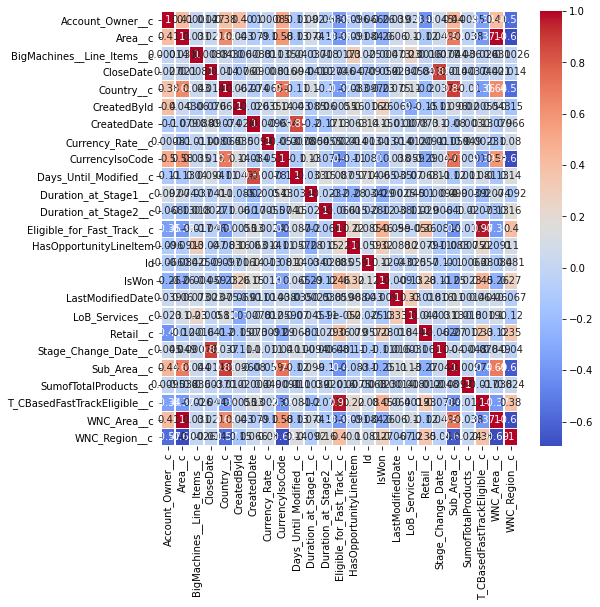

In [16]:
corr = updated_df.corr()
fig, ax = plt.subplots(figsize=(8,8))
sb.heatmap(corr, annot=True, cmap='coolwarm',linewidths = .5, ax = ax)

In [17]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = updated_df.columns[columns]
updated_df = updated_df[selected_columns]

In [18]:
print(corr["IsWon"].sort_values(ascending=False))

IsWon                           1.000000
Eligible_for_Fast_Track__c      0.462870
T_CBasedFastTrackEligible__c    0.452593
HasOpportunityLineItem          0.317172
Retail__c                       0.280847
WNC_Region__c                   0.270868
CreatedById                     0.255614
CreatedDate                     0.152575
Id                              0.118839
Days_Until_Modified__c          0.064523
SumofTotalProducts__c           0.022903
Currency_Rate__c                0.012518
BigMachines__Line_Items__c     -0.004041
LastModifiedDate               -0.009030
CloseDate                      -0.058500
Stage_Change_Date__c           -0.108266
Duration_at_Stage2__c          -0.120809
LoB_Services__c                -0.132658
Country__c                     -0.231597
Sub_Area__c                    -0.253089
WNC_Area__c                    -0.257263
Area__c                        -0.257263
Account_Owner__c               -0.258779
Duration_at_Stage1__c          -0.290529
CurrencyIsoCode 

In [19]:
updated_df 

,Account_Owner__c,Area__c,BigMachines__Line_Items__c,CloseDate,Country__c,CreatedById,CreatedDate,Currency_Rate__c,CurrencyIsoCode,Days_Until_Modified__c,...,HasOpportunityLineItem,Id,IsWon,LastModifiedDate,LoB_Services__c,Retail__c,Stage_Change_Date__c,Sub_Area__c,SumofTotalProducts__c,WNC_Region__c
0,394,22,1,209,139,547,0,1.000000,30,-610.0,...,1,35475,1,765,0,0,140,45,1,0
1,334,22,1,19,139,504,1,1.000000,30,-608.0,...,1,35476,1,2312,0,0,17,45,4500,0
2,208,4,1,302,25,236,2,1.344356,2,-514.0,...,1,35477,0,829,0,0,309,9,0,0
3,4,22,2,328,139,3,3,1.000000,30,-546.0,...,1,35478,0,923,0,0,244,45,0,0
4,432,13,1,648,13,592,4,1.000000,30,-414.0,...,1,35479,0,137,0,0,450,10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42986,334,22,1,673,139,542,37854,1.000000,30,0.0,...,1,35470,1,4437,1,0,563,45,4587,0
42987,176,10,1,673,131,237,37855,1.000000,30,0.0,...,1,35471,1,3750,0,1,563,17,12200,1
42988,211,6,0,673,46,300,37856,0.840972,9,0.0,...,0,35472,0,2841,0,1,563,14,0,1
42989,111,6,0,673,46,138,37857,0.840972,9,0.0,...,0,35473,0,3579,0,1,563,14,0,1


In [20]:
updated_df.to_csv(r'C:\Users\nilanjan.das\Downloads\preprocessed_opportunities_latest.csv', index=False,header = True)

In [21]:
updated_df = pd.read_csv(r'C:\Users\nilanjan.das\Downloads\preprocessed_opportunities_latest.csv')

In [22]:
from sklearn.model_selection import train_test_split
X = updated_df.drop(columns=['IsWon'])
y = updated_df['IsWon']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=4)



In [23]:
x_train = np.nan_to_num(x_train)
x_test = np.nan_to_num(x_test)

In [24]:
from keras.layers import Dense, Dropout, LSTM, Embedding
from keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from keras.models import Sequential
import pandas as pd
import numpy as np

#input_file = 'input.csv'

def load_data(x_train, x_test, y_train, y_test):


    return pad_sequences(x_train), y_train, pad_sequences(x_test), y_test


def create_model(X):
    print ('Creating model...')
    model = Sequential()
    model.add(LSTM(32, activation='tanh',input_shape=(X.shape[1],1)))
    model.add(Dense(1,activation='sigmoid'))
    adm = tf.keras.optimizers.Adam(learning_rate=0.005)
    model.compile(loss='binary_crossentropy', optimizer=adm, metrics=['accuracy'])
    return model


X_train, y_train, X_test, y_test = load_data(x_train, x_test, y_train, y_test)

model = create_model(X_train)

print ('Fitting model...')
hist = model.fit(X_train, y_train, batch_size=64, epochs=10, validation_split = 0.1, verbose = 1)

score, acc = model.evaluate(X_test, y_test, batch_size=1)
print('Test score:', score)
print('Test accuracy:', acc)

Creating model...
Fitting model...
Epoch 1/10
424/424 [==============================] - 5s 7ms/step - loss: 0.0473 - accuracy: 0.9924 - val_loss: 0.0126 - val_accuracy: 0.9983
Epoch 2/10
424/424 [==============================] - 3s 6ms/step - loss: 0.0140 - accuracy: 0.9979 - val_loss: 0.0112 - val_accuracy: 0.9983
Epoch 3/10
424/424 [==============================] - 3s 7ms/step - loss: 0.0133 - accuracy: 0.9979 - val_loss: 0.0108 - val_accuracy: 0.9983
Epoch 4/10
424/424 [==============================] - 3s 6ms/step - loss: 0.0126 - accuracy: 0.9979 - val_loss: 0.0096 - val_accuracy: 0.9983
Epoch 5/10
424/424 [==============================] - 3s 7ms/step - loss: 0.0129 - accuracy: 0.9979 - val_loss: 0.0093 - val_accuracy: 0.9983
Epoch 6/10
424/424 [==============================] - 3s 6ms/step - loss: 0.0116 - accuracy: 0.9979 - val_loss: 0.0106 - val_accuracy: 0.9983
Epoch 7/10
424/424 [==============================] - 3s 7ms/step - loss: 0.0111 - accuracy: 0.9980 - val_loss: 0

In [25]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9975965265932702


In [26]:
from catboost import CatBoostClassifier
cat_model = CatBoostClassifier(verbose=0, n_estimators=100)
cat_model.fit(x_train, y_train)
y_pred = cat_model.predict(x_test)
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9975189951930532


In [ ]:
import pickle

# save the model to disk
with open('cat_model_oppor', 'wb') as files:
    pickle.dump(cat_model, files)

In [27]:
print(metrics.precision_score(y_test, y_pred)),
print(metrics.recall_score(y_test, y_pred)), 
print(metrics.f1_score(y_test, y_pred))

0.9989710610932476
0.9969195225259915
0.9979442374405756


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, truncnorm, randint
model_params = {
    # randomly sample numbers from 4 to 204 estimators
    'verbose': randint(0,5),
    # normally distributed max_features, with mean .25 stddev 0.1, bounded between 0 and 1
    'n_estimators': randint(50,150),
    # uniform distribution from 0.01 to 0.2 (0.01 + 0.199)
    
}


In [ ]:
rf_model = CatBoostClassifier()

# set up random search meta-estimator
# this will train 100 models over 5 folds of cross validation (500 models total)
clf = RandomizedSearchCV(rf_model, model_params, n_iter=5, cv=5, random_state=1)

# train the random search meta-estimator to find the best model out of 100 candidates
model = clf.fit(x_train, y_train)

# print winning set of hyperparameters
from pprint import pprint
pprint(model.best_estimator_.get_params())

In [ ]:
from lightgbm import LGBMClassifier
model = LGBMClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))